<a href="https://colab.research.google.com/github/xafsithoo-sys/ai-swe-wk2/blob/main/kenyarainfallML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Load your rainfall dataset (replace with your path)
rainfall_df = pd.read_csv("rainfall.csv")
rainfall_df.head()


,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


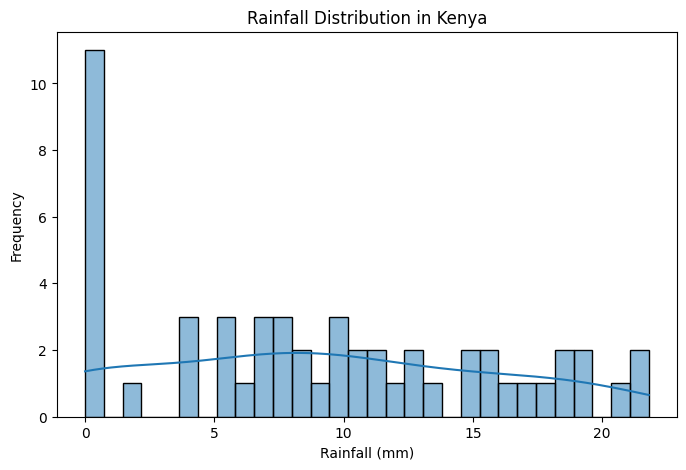

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(rainfall_df['rainfall'], bins=30, kde=True)
plt.title("Rainfall Distribution in Kenya")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#preparing data for neuralnetworks
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load your rainfall dataset (replace with your path)
rainfall_df = pd.read_csv("rainfall.csv")

# Extract year and month from the 'date' column
rainfall_df['date'] = pd.to_datetime(rainfall_df['date'], errors='coerce')

# Drop rows with invalid dates
rainfall_df.dropna(subset=['date'], inplace=True)

rainfall_df['year'] = rainfall_df['date'].dt.year
rainfall_df['month'] = rainfall_df['date'].dt.month

# Features
X = rainfall_df[['year', 'month', 'rainfall', 'temperature', 'humidity', 'wind_speed']]
y = rainfall_df['weather_condition']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
#bulding neuralnetworks
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Changed to 2 output neurons
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,594 (10.13 KB)

 Trainable params: 2,594 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.8225 - loss: 0.6901 - val_accuracy: 0.7273 - val_loss: 0.8705
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7716 - loss: 0.6862 - val_accuracy: 0.7273 - val_loss: 0.7703
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8032 - loss: 0.6230 - val_accuracy: 0.7273 - val_loss: 0.6813
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7876 - loss: 0.5973 - val_accuracy: 0.7273 - val_loss: 0.6017
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8151 - loss: 0.5212 - val_accuracy: 0.7273 - val_loss: 0.5351
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8188 - loss: 0.4607 - val_accuracy: 0.7273 - val_loss: 0.4736
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8620 - loss: 0.4031 - val_accuracy: 0.7273 - val_loss: 0.4204
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8266 - loss: 0.4253 - val_accuracy: 1.0000 - val_loss: 0.3737

✅ Test Accuracy: 100.00%


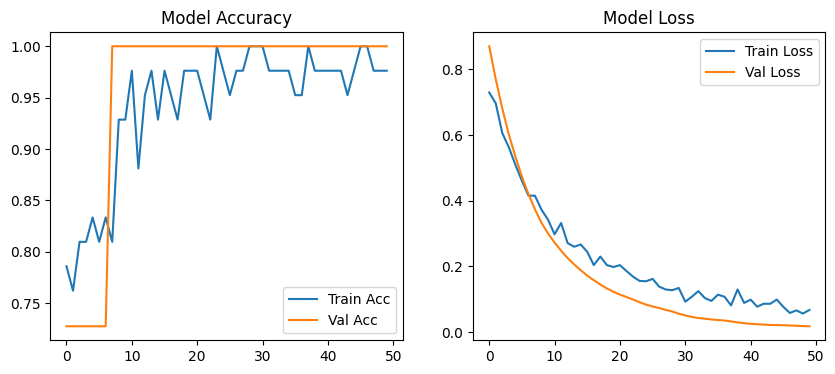

In [ ]:
# Evaluate on test data
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


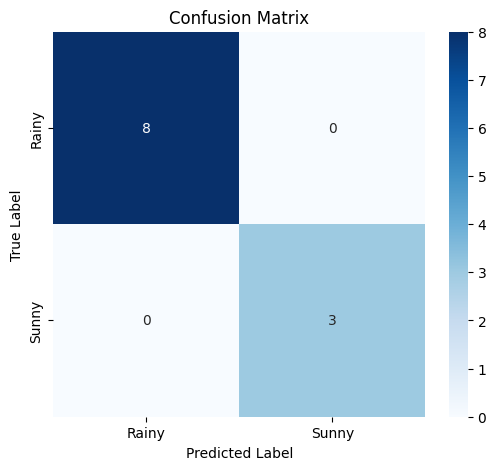

In [ ]:
#confusion matrix
# Get predictions for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to original labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Make predictions on new data
# Replace this with your new data
new_data = pd.DataFrame({
    'year': [2023, 2023, 2023],
    'month': [1, 6, 12],
    'rainfall': [5.0, 1.0, 15.0],
    'temperature': [25.0, 30.0, 20.0],
    'humidity': [60.0, 40.0, 85.0],
    'wind_speed': [5.0, 10.0, 7.0]
})

# Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = model.predict(new_data_scaled)

# Get the predicted class (index of the highest probability)
predicted_classes_encoded = np.argmax(predictions, axis=1)

# Inverse transform the predicted classes to get the original labels
predicted_weather_conditions = le.inverse_transform(predicted_classes_encoded)

print("Predictions for new data:")
print(predicted_weather_conditions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predictions for new data:
['Rainy' 'Rainy' 'Rainy']


In [ ]:
#save the model
model.save("kenya_water.keras")
print("💾 Model saved as 'kenya_water.keras'")

💾 Model saved as 'kenya_water.keras'


In [ ]:
import joblib

# Save your trained model
model.save("kenya_water.keras")

# Save your scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [ ]:
# =========================================================
# 💧 AI for Tackling Water Scarcity in Kenya (Full App)
# =========================================================
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import joblib
import pydeck as pdk
from tensorflow.keras.models import load_model

# ---------------------------------------------------------
# Load model and scaler
# ---------------------------------------------------------
@st.cache_resource
def load_artifacts():
    model = load_model("kenya_water.keras")
    scaler = joblib.load("scaler.pkl")
    return model, scaler

model, scaler = load_artifacts()
labels = ['Sunny', 'Rainy']

# ---------------------------------------------------------
# County rainfall baselines (approximate averages)
# ---------------------------------------------------------
county_baseline = {
    "Turkana": 15.0, "Marsabit": 30.0, "Garissa": 25.0, "Wajir": 35.0,
    "Mandera": 40.0, "Machakos": 80.0, "Kitui": 60.0, "Nakuru": 100.0,
    "Nyeri": 120.0, "Kisumu": 150.0, "Nairobi": 110.0, "Mombasa": 160.0,
    "Kwale": 140.0, "Narok": 90.0, "Baringo": 75.0,
}

# County coordinates
county_coords = {
    "Turkana": [3.121, 35.596], "Marsabit": [2.34, 37.99], "Garissa": [0.456, 39.646],
    "Wajir": [1.747, 40.057], "Mandera": [3.937, 41.856], "Machakos": [-1.517, 37.263],
    "Kitui": [-1.367, 38.010], "Nakuru": [-0.303, 36.080], "Nyeri": [-0.420, 36.950],
    "Kisumu": [-0.0917, 34.768], "Nairobi": [-1.286, 36.817], "Mombasa": [-4.043, 39.668],
    "Kwale": [-4.173, 39.452], "Narok": [-1.085, 35.871], "Baringo": [0.678, 35.967],
}

# ---------------------------------------------------------
# Streamlit Page Setup
# ---------------------------------------------------------
st.set_page_config(page_title="Kenya Water AI", page_icon="💧", layout="wide")

st.title("💧 AI for Tackling Water Scarcity in Kenya")
st.markdown("""
This app uses an **AI Neural Network** trained on Kenyan regional data
to predict **Weather Conditions** (Sunny/Rainy) based on rainfall and climate variables.

🔹 Supports **SDG 6: Clean Water and Sanitation**
🔹 Supports **SDG 13: Climate Action**
""")

# ---------------------------------------------------------
# User Inputs
# ---------------------------------------------------------
st.header("📍 Predict Regional Weather Condition")

col1, col2 = st.columns(2)
with col1:
    county = st.selectbox("Select County", sorted(county_baseline.keys()))
with col2:
    rainfall_mm = st.number_input("Monthly Rainfall (mm)", min_value=0.0, max_value=1000.0, value=float(county_baseline[county]))

col3, col4, col5 = st.columns(3)
with col3:
    year = st.number_input("Year", min_value=1980, max_value=2035, value=2025)
with col4:
    month = st.number_input("Month (1-12)", min_value=1, max_value=12, value=10)
with col5:
    wind_speed = st.number_input("Wind Speed (km/h)", min_value=0.0, max_value=50.0, value=5.0)

temperature = st.slider("🌡️ Average Temperature (°C)", 10.0, 40.0, 25.0)
humidity = st.slider("💨 Humidity (%)", 10.0, 100.0, 60.0)

# ---------------------------------------------------------
# Predict selected county's weather
# ---------------------------------------------------------
input_data = np.array([[year, month, temperature, humidity, wind_speed, rainfall_mm]])
input_scaled = scaler.transform(input_data)
prediction = model.predict(input_scaled)
predicted_class = np.argmax(prediction)
availability = labels[predicted_class]

st.success(f"🌍 County: **{county}** → 💧 Predicted Weather: **{availability}**")

st.bar_chart(pd.DataFrame(prediction, columns=labels))

if availability == "Sunny":
    st.info("☀️ Expected weather is **Sunny**. Water scarcity may increase — consider conservation measures.")
else:
    st.warning("🌧️ Expected weather is **Rainy**. Ensure water harvesting and flood management systems are ready.")
    # ---------------------------------------------------------
# 🌍 Dynamic Kenya Weather Map with Auto-Zoom + Summary Card
# ---------------------------------------------------------

st.header("🗺️ Interactive Kenya Weather Prediction Map")

# Dropdown for user to focus on a specific county
selected_county = st.selectbox(
    "🔎 Choose a county to focus on:",
    options=["All Counties"] + list(county_coords.keys()),
    index=0
)

# --- Function to generate predictions ---
def generate_map_data(year, month, temperature, humidity, wind_speed, rainfall):
    data = []
    for cty, (lat, lon) in county_coords.items():
        baseline_rainfall = county_baseline[cty]
        rainfall_input = rainfall or baseline_rainfall

        x = np.array([[year, month, temperature, humidity, wind_speed, rainfall_input]])
        x_scaled = scaler.transform(x)
        pred = model.predict(x_scaled)
        pred_class = np.argmax(pred)
        condition = labels[pred_class]

        color = [255, 210, 0] if condition == "Sunny" else [0, 140, 255]

        data.append({
            "County": cty,
            "Latitude": lat,
            "Longitude": lon,
            "Condition": condition,
            "Rainfall (mm)": round(rainfall_input, 1),
            "Temperature (°C)": temperature,
            "color": color
        })
    return pd.DataFrame(data)

# Generate prediction data
df_map = generate_map_data(year, month, temperature, humidity, wind_speed, rainfall_mm)

# Determine zoom + center dynamically
if selected_county != "All Counties":
    focus_lat, focus_lon = county_coords[selected_county]
    zoom_level = 8.5
else:
    focus_lat, focus_lon = 0.2, 37.8
    zoom_level = 6.5

# --- Layout for Map and Summary Card ---
col_map, col_info = st.columns([3, 1])

# 🗺️ Display Interactive Map
with col_map:
    st.pydeck_chart(
        pdk.Deck(
            map_style="mapbox://styles/mapbox/dark-v10",
            initial_view_state=pdk.ViewState(
                latitude=focus_lat,
                longitude=focus_lon,
                zoom=zoom_level,
                pitch=50,
                bearing=20
            ),
            layers=[
                pdk.Layer(
                    "ScatterplotLayer",
                    data=df_map,
                    get_position='[Longitude, Latitude]',
                    get_fill_color='color',
                    get_radius=70000,
                    pickable=True,
                    opacity=0.9
                ),
                pdk.Layer(
                    "TextLayer",
                    data=df_map,
                    get_position='[Longitude, Latitude]',
                    get_text="County",
                    get_color=[255, 255, 255],
                    get_size=16,
                    get_alignment_baseline="'bottom'"
                ),
            ],
            tooltip={"text": "{County}\nCondition: {Condition}\nRainfall: {Rainfall (mm)} mm"}
        )
    )


# 🧾 Display Summary Card
with col_info:
    st.subheader("📋 County Summary")
    if selected_county == "All Counties":
        st.info("Select a county to view detailed predictions.")
    else:
        selected_data = df_map[df_map["County"] == selected_county].iloc[0]
        condition = selected_data["Condition"]
        rain = selected_data["Rainfall (mm)"]
        temp = selected_data["Temperature (°C)"]

        st.metric("🌍 County", selected_county)
        st.metric("🌤️ Condition", condition)
        st.metric("🌧️ Rainfall (mm)", f"{rain}")
        st.metric("🌡️ Temperature (°C)", f"{temp}")
        if condition == "Rainy":
            st.warning("☔ Expect wet conditions — possible heavy showers.")
        else:
            st.success("☀️ Sunny and clear — minimal rainfall expected.")

st.caption(
    "💡 Select a county to zoom in and see AI-predicted conditions. "
    "The summary updates instantly with temperature and rainfall."
)

# ---------------------------------------------------------
# 📊 Explore County Rainfall & Temperature Patterns
# ---------------------------------------------------------
st.header("📊 Explore County Rainfall & Weather Patterns")

weather_data = {
    "Turkana":  {"rainfall": [10, 12, 15, 14, 18, 10, 8, 5, 7, 9, 11, 13],
                 "temperature": [34, 35, 36, 37, 38, 39, 38, 37, 36, 35, 34, 33]},
    "Nairobi":  {"rainfall": [100, 80, 60, 40, 50, 20, 30, 70, 90, 120, 110, 95],
                 "temperature": [27, 26, 25, 23, 22, 21, 22, 23, 25, 26, 27, 28]},
    "Mombasa":  {"rainfall": [160, 140, 150, 130, 120, 100, 90, 110, 130, 150, 170, 180],
                 "temperature": [30, 31, 31, 30, 29, 28, 27, 28, 29, 30, 31, 32]},
    "Kisumu":   {"rainfall": [120, 100, 80, 60, 70, 90, 110, 130, 140, 160, 170, 150],
                 "temperature": [29, 28, 27, 26, 25, 26, 27, 28, 29, 30, 30, 29]},
}

col1, col2 = st.columns(2)
with col1:
    county_a = st.selectbox("Select County A", weather_data.keys(), index=0)
with col2:
    county_b = st.selectbox("Select County B", weather_data.keys(), index=1)

df_a = pd.DataFrame({
    "Month": list(range(1, 13)),
    "Rainfall (mm)": weather_data[county_a]["rainfall"],
    "Temperature (°C)": weather_data[county_a]["temperature"],
    "County": county_a
})
df_b = pd.DataFrame({
    "Month": list(range(1, 13)),
    "Rainfall (mm)": weather_data[county_b]["rainfall"],
    "Temperature (°C)": weather_data[county_b]["temperature"],
    "County": county_b
})
combined_df = pd.concat([df_a, df_b])

st.subheader("🌧️ Monthly Rainfall Comparison")
st.line_chart(combined_df.pivot(index="Month", columns="County", values="Rainfall (mm)"))

st.subheader("🔥 Monthly Temperature Comparison")
st.line_chart(combined_df.pivot(index="Month", columns="County", values="Temperature (°C)"))

month_selected = st.slider("Select Month", 1, 12, 6)
st.write(f"📅 **Month {month_selected}** Climate Snapshot:")

rainfall_a = weather_data[county_a]["rainfall"][month_selected - 1]
rainfall_b = weather_data[county_b]["rainfall"][month_selected - 1]
temp_a = weather_data[county_a]["temperature"][month_selected - 1]
temp_b = weather_data[county_b]["temperature"][month_selected - 1]

col1, col2 = st.columns(2)
with col1:
    st.metric(f"{county_a} Rainfall (mm)", rainfall_a)
    st.metric(f"{county_a} Temp (°C)", temp_a)
with col2:
    st.metric(f"{county_b} Rainfall (mm)", rainfall_b)
    st.metric(f"{county_b} Temp (°C)", temp_b)

st.caption("💡 Compare rainfall and temperature patterns across counties to identify climate risks and plan water management.")

# ---------------------------------------------------------
# Footer
# ---------------------------------------------------------
st.markdown("---")
st.write("👩‍💻 Developed as part of an AI for Sustainability project — addressing **SDG 6** & **SDG 13**.")






Overwriting app.py


In [ ]:
%%writefile requirements.txt

# ===== Core Libraries =====
numpy==1.26.4
pandas==2.2.3

# ===== Machine Learning =====
tensorflow==2.17.0
scikit-learn==1.5.2
joblib==1.4.2

# ===== Visualization =====
matplotlib==3.9.2
plotly==5.24.0
folium==0.17.0

# ===== Web App =====
streamlit==1.39.0
pyngrok==7.1.6



Overwriting requirements.txt


In [ ]:
%%writefile kenya_rainfall_data.csv
Month,Rainfall (mm)
Jan,82
Feb,40
Mar,120
Apr,200
May,180
Jun,90
Jul,75
Aug,60
Sep,55
Oct,130
Nov,170
Dec,140


Writing kenya_rainfall_data.csv


In [ ]:
# ======================================
# ✅ Clean install for Colab (no conflicts)
# ======================================

!pip install -q \
    streamlit==1.39.0 \
    tensorflow==2.19.0 \
    scikit-learn==1.6.0 \
    joblib==1.4.2 \
    matplotlib==3.9.2 \
    plotly==5.24.0 \
    folium==0.17.0 \
    pyngrok==7.1.6



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.1 MB/s eta 0:00:00


In [ ]:


# ===== Import pyngrok and OS =====
from pyngrok import ngrok
import os

# ===== Kill any existing tunnels =====
ngrok.kill()

# ===== Define Streamlit port =====
port = 8501

# ===== Run Streamlit app in background =====
# ⚠️ Make sure your file is named "app.py"
os.system(f"streamlit run app.py --server.port {port} &")

# ===== Create a new public Ngrok URL =====
public_url = ngrok.connect(port)
print("\n✅ Your Streamlit app is live here:\n", public_url)


In [ ]:
from pyngrok import ngrok

# 🔑 Replace YOUR_TOKEN_HERE with your actual token
!ngrok config add-authtoken 346qrzuiV7eMzdSwS5DywUEoL9i_UwM3rtKhvZykDBoGfQcn


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install streamlit pyngrok -q

from pyngrok import ngrok
import time

ngrok.kill()

public_url = ngrok.connect(8501)
print("🌍 Your Streamlit App is Live Here:", public_url)

!streamlit run app.py &>/dev/null&
time.sleep(5)
print("✅ Streamlit app started successfully! Visit the link above 👆")


🌍 Your Streamlit App is Live Here: NgrokTunnel: "https://nondependably-superfine-carlie.ngrok-free.dev" -> "http://localhost:8501"
✅ Streamlit app started successfully! Visit the link above 👆


In [ ]:
import joblib
scaler = joblib.load("scaler.pkl")
print("Scaler expects:", scaler.n_features_in_, "features")


Scaler expects: 6 features


In [ ]:
from google.colab import files
!zip -r kenya_water_ai.zip app.py requirements.txt scaler.pkl kenya_water.keras
files.download('kenya_water_ai.zip')


  adding: app.py (deflated 67%)
  adding: requirements.txt (deflated 33%)
  adding: scaler.pkl (deflated 37%)
  adding: kenya_water.keras (deflated 45%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>